# [E-02] LinearRegression

## Project 1 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

Data는  sklearn.dataset에서 제공하는 당뇨병 데이터를 사용한다.
Data를 적당히 가공하여 사용한다. 불필요한 colum을 제거 후 Test set과 Train set을 나눈다.
LinearRegression을 모델을 만들고 학습시켜 당뇨병 수치를 예상해본다.
이후 수치를 시각화하여 모델의 성능을 직관적으로 살펴보는 프로젝트이다.

### 1. data 가져오기

#### 1-1. sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.

In [1]:
from sklearn.datasets import load_diabetes # sklearn dataset에서 제공하는 load_diabetes를 import한다

diabetes=load_diabetes()
print(dir(diabetes)) # dir() 함수를 사용하여 어떠한 method가 있는지를 살펴본다.
print(diabetes.DESCR) # diabetes에대한 대략적인 정보를 살펴본다.

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg

In [2]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

age, sex, bmi, bp, s1, s2, s3, s4, s5, s6을 feature값으로 같는다.

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

data값을 -2,+2 사이의 값들로 되어있다. 이는 data들을 정규화 시켜놓은 것이다.

#### 1-2. diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [4]:
import pandas as pd

df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=['target'])

print('df_X: ', df_X.shape)
print('df_y: ', df_y.shape)

df_X:  (442, 10)
df_y:  (442, 1)


### 2. model에 입력할 data X 준비하기

#### 2-1. df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [5]:
X =df_X.values
print(type(X))

<class 'numpy.ndarray'>


data method를 활용하여 df_X에 numpy array 형태로 저장해놓았다.

### 3. 모델에 예측할 데이터 y 준비하기

#### 3-1. df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [6]:
y = df_y['target'].values
print(type(y))

<class 'numpy.ndarray'>


target method를 활용하여 df_y에 numpy 형태로 저장해놓았다.

### 4.  train 데이터와 test 데이터로 분리하기

#### 4-1. X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.


In [7]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test로 dataset을 나눠준다. 나중에 train data를 학습한 model이 test data를 predict하여  정답과 비교하여 성능을 측정해본다.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=7)

### 5. 모델 준비하기

#### 5-1. 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.


In [8]:
import numpy as np
# 가중치 W와 n을 10개와 1개씩 뽑아준다.
W = np.random.rand(10)
b = np.random.rand()

random으로 가중치 W와 b를 뽑아준다.

### 5-2. 모델 함수를 구현해주세요.

In [9]:
def model(X, W, b):
    """
    Argument :
    X: train에 사용할 feature dataset이 들어온다.
    W: 가중치
    b: 가중치
    
    return :
    predictions 가중치를 적용한 예상값
        
    """
    predictions = 0
    
    # X의 요소 각각을 요소에 해당하는 X값과 가중치를 곱해준 값을 더한 것을 return한다.
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### 6. 손실함수 loss 정의하기

#### 6-1. 손실함수를 MSE 함수로 정의해주세요.

In [10]:
def loss(X, W, b, y):
    """
    손실함수로 machine이 예상한 값과 실제값의 평균제곱오차를 구해준다.
    
    Argument :
    X: train에 사용할 feature dataset이 들어온다.
    W: 가중치
    b: 가중치
    y: target vector값이 들어온다.
    
    return :
    MSE = Mean Squared Error(평균제곱오차)
    각요소의 제곱오차들 더해서 각요소의 갯수로 나눠준 값을 return해준다.
    손실값으로 많이 쓰인다.
    """
    predictions = model(X, W, b)
    L = ((predictions - y)**2).mean()
    return L

### 7. 기울기를 구하는 gradient 함수 구현하기

#### 7-1. 기울기를 계산하는 gradient 함수를 구현해주세요.

In [11]:
def gradient(X, W, b, y):
    """
    경사하강법에서 쓰이는 함수로
    손실함수에대한 가중치들의 기울기를 계산하는 gradient 함수
    
    Argument :
    X: train에 사용할 feature dataset이 들어온다.
    W: 가중치
    b: 가중치
    y: target vector값이 들어온다.
    
    return :
    손실함수에대한 가중치의 변화율을 return해준다.
    경사하강법을 이용하여 최적의 값을 찾아가기위한 방향과 정도를 정해준다.
    dL/dW 값인 dW와 dL/db값인 db를 수학적인 미분 공식을 사용하여 return하여준다.
    """
    # N은 가중치의 개수
    N = len(W)
    # y_pred 준비
    y_pred = model(X, W, b)
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

### 8. 하이퍼 파라미터인 학습률 설정하기

#### 8.1 학습률, learning rate 를 설정해주세요

In [12]:
LEARNING_RATE = 0.001

하이퍼 파라미터는 미리 정해주는 parameter가 된다. 적절한 값을 조정하여 최고의 값을 얻어야한다.

#### 8-2 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

 learning rate가 -가되면 어떨까? 궁금증이 생겨서 값을 넣어보았다. 결과는 손실함수가 점점 커져서 무한대에 수렴하는 그래프가 나왔다.
생각해보면 기울기가 - 이면 최적의 값보다는 -방향에 있으니 그 값을 -로 빼줘서 +방향으로 움직이기 위함이었고 기울기가 +이면 그값을 빼줘서 - 방향으로 움직이기 위함이었다. 그러니 learning rate가 -가되면 모든 방향성들이 반대가 되어 - 방향이었다면 -방향으로 더 이동을 하고 + 방향이었다면 +방향으로 이동을하여서 손실이 무한대로 커졌을 것이다. 굳이 learning rate를 음수로 쓰고 싶다면

    dW, db = gradient(X_train, W, b, y_train)
    W += LEARNING_RATE * dW
    b += LEARNING_RATE * db

이와 같이 바꿔주면 작동되는 것을 확인할 수 있다.

Learning_rate가 커지면 경사를 타고 움직일 때 크게 크게 타고 움직여 최적의 포인트를 놓치고 특정 값에 이르게 수렴할 수 있다. 장점이라고 한다면 빠르다는 것이 있다.

Learning_rate가 작으면 경사를 타고 움직일 때 조금씩 움직여 최적의 포인트를 발견할 확률이 높다. 반면에 오래걸린다. 그리고 학습 반복이 얼마되지 못할 때에는 손실의 최저점을 찾기 전에 끝날 수 있다.

한번 그래프를 그려서 확인해보려고 한다.

Learning_rate를 0.001로 뒀을 때이다. 0.01로 두고 학습을 3000번 시켰을 때, 학습률이 작아서 최저점에 도달하지 못한 그래프가 나타나고 있다.

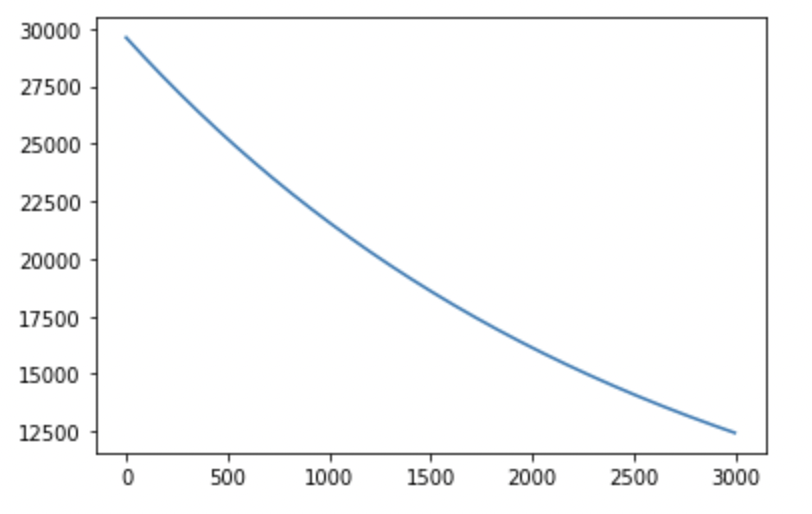

Learning rate를 0.1로 뒀을 때이다. 금방 최저점까지 진입하지만 그 이후 더이상 디테일한 부분까지는 도달하지 못하는 모습이다.

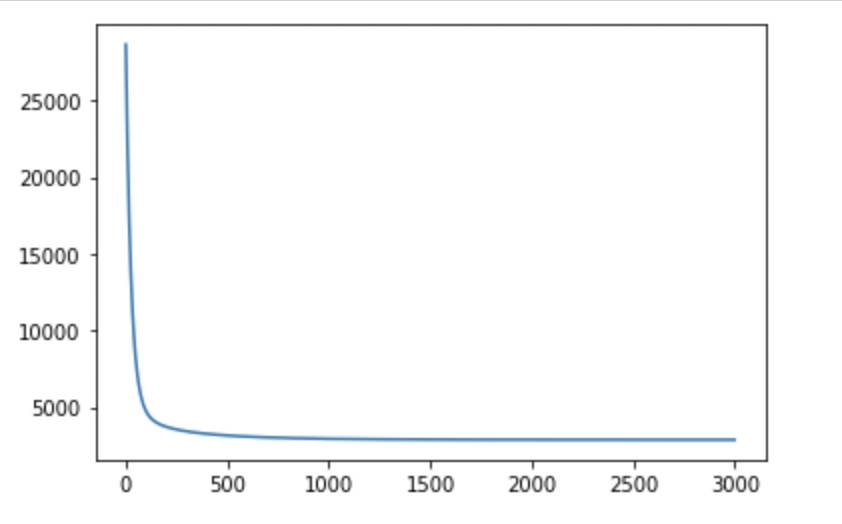

Learning rate를 0.01로 뒀을 때 가장 이상적인 모양을 하고 있는 것을 볼 수 있다.

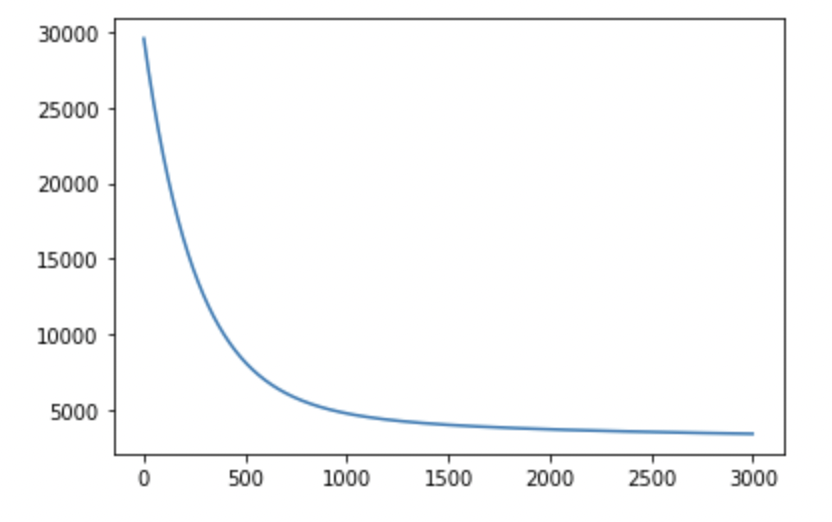

### 9. 모델 학습하기

#### 9-1. 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.

In [13]:
losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 28673.4214
Iteration 20 : Loss 27757.3377
Iteration 30 : Loss 26876.4247
Iteration 40 : Loss 26029.3107
Iteration 50 : Loss 25214.6779
Iteration 60 : Loss 24431.2599
Iteration 70 : Loss 23677.8399
Iteration 80 : Loss 22953.2489
Iteration 90 : Loss 22256.3635
Iteration 100 : Loss 21586.1045
Iteration 110 : Loss 20941.4348
Iteration 120 : Loss 20321.3579
Iteration 130 : Loss 19724.9165
Iteration 140 : Loss 19151.1905
Iteration 150 : Loss 18599.2960
Iteration 160 : Loss 18068.3838
Iteration 170 : Loss 17557.6377
Iteration 180 : Loss 17066.2734
Iteration 190 : Loss 16593.5377
Iteration 200 : Loss 16138.7065
Iteration 210 : Loss 15701.0841
Iteration 220 : Loss 15280.0021
Iteration 230 : Loss 14874.8182
Iteration 240 : Loss 14484.9153
Iteration 250 : Loss 14109.7002
Iteration 260 : Loss 13748.6033
Iteration 270 : Loss 13401.0769
Iteration 280 : Loss 13066.5948
Iteration 290 : Loss 12744.6516
Iteration 300 : Loss 12434.7615
Iteration 310 : Loss 12136.4575
Iteration 320 : L

Iteration 3000 : Loss 3435.0367


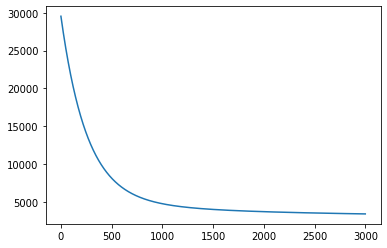

In [14]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

#### 9-2. loss값이 충분히 떨어질 때까지 학습을 진행해주세요.

학습을 많이 진행할 수록 loss 값이 떨어진다. 999000까지 반복했을 때의 결과는    
        Iteration 999000 : Loss 2851.2187
        였다. 
시간이 너무 많이 걸렸다. 학습이 많을 수록 좋을 것 같긴하지만 적정시점이 언제인지는 잘 모르겠다.
하지만 3000까지만 학습해도 충분히 값이 떨어진 그래프의 모습을 볼 수 있다. 나중에 mse를 측정할 때 프로젝트 평가기준인 3000에 도달한다.

#### 9-3. 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

관계성 함수를 사용하여 관계성 함수가 높았던 값과 관계성 함수가 낮았던 값을 하나씩 빼보았을 때 feature가 어떻게 다른지 확인해본다. 간편하게 LinearRegression model을 사용하여 비교하고 넘어가고자한다.

In [15]:
formin = []

# feature을 모두 대입하여 관계성 함수 matrix를 구하고 0행 1열에서 그값을 구해 최소와 최대 값을 구하기 위하여
#(값, 이름)의 튜플형태로 리스트에 추가한다.
for i in range(10):
    diabetes.feature_names[i]
    print('corrcoef: ',diabetes.feature_names[i],' is ', abs(np.corrcoef(X[:, i],y)[0][1]))
    formin.append((abs(np.corrcoef(X[:, i],y)[0][1]), diabetes.feature_names[i]))
    
    
print(f'관계성 함수가 가장 낮은 feature는 {min(formin)[1]} 이고 그 값은 {min(formin)[0]} 이다')
print(f'관계성 함수가 가장 높은 feature는 {max(formin)[1]} 이고 그 값은 {max(formin)[0]} 이다')

corrcoef:  age  is  0.18788875071891983
corrcoef:  sex  is  0.0430619984516054
corrcoef:  bmi  is  0.5864501344746891
corrcoef:  bp  is  0.4414838489308862
corrcoef:  s1  is  0.2120224810145508
corrcoef:  s2  is  0.17405358696874249
corrcoef:  s3  is  0.39478925067091847
corrcoef:  s4  is  0.4304528847447734
corrcoef:  s5  is  0.5658834252428094
corrcoef:  s6  is  0.3824834842485812
관계성 함수가 가장 낮은 feature는 sex 이고 그 값은 0.0430619984516054 이다
관계성 함수가 가장 높은 feature는 bmi 이고 그 값은 0.5864501344746891 이다


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 값 추출해주고 test set train set 분리해주기
X1 = df_X[['age','bmi','bp','s1','s2','s3','s4','s5','s6']].values
y1 = df_y['target'].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=7)

X2 = df_X[['age','sex','bp','s1','s2','s3','s4','s5','s6']].values
y2 = df_y['target'].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=7)


# model 선언 이후 학습시키고 값 예측하기
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

model3 = LinearRegression()
model3.fit(X_train, y_train)
y3_pred = model3.predict(X_test)

# mse 구하기
mse1 = mean_squared_error(y1_test, y1_pred, squared = True)
mse2 = mean_squared_error(y2_test, y2_pred, squared = True)
mse3 = mean_squared_error(y_test, y3_pred, squared = True)
print(f'Nothing change mse is {mse3}, With out sex mse is {mse1}, and With out bmi mse is{mse2}')


Nothing change mse is 2966.040299284217, With out sex mse is 2986.762992437097, and With out bmi mse is3255.620381460971


관계성이 낮은 feature인 sex를 제거해준 model이 관계성이 높은 bmi를 제거해준 model보다 성능이 좋았다. 그리고 아무것도 제거 안해줬을 때보다 sex를 제거해주니 mse 값이 줄어들은 것을 확인할 수 있다. 관계성 함수에서 나온 값이 유용하게 쓰일 수 있다는 것을 알 수 있었다.

### 10. test 데이터에 대한 성능 확인하기

#### 10-1. test 데이터에 대한 성능을 확인해주세요.

In [17]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2993.59641693129

평가기준인 3000보다 낮은 것을 확인할 수 있다.

### 11. 정답 데이터와 예측한 데이터 시각화하기

#### 11 -1. x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

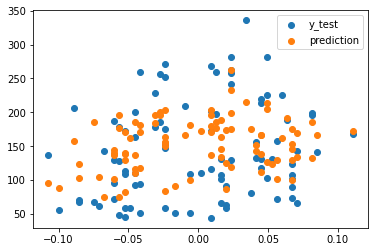

In [18]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.legend(["y_test" , "prediction"])
plt.show()

## Project 2 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

### 1. 데이터 가져오기

터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
여기에서 데이터를 상세히 확인할 수 있습니다.

In [19]:
import pandas as pd
bike = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(bike.shape)
bike.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

#### 2-1. to_datetime 활용

In [20]:
# pandas의 method인 to_datetime을 이용하여 년-월-일 시:분:초 format으로 저장하여준다.
bike['datetime'] = pd.to_datetime(bike['datetime'], format='%Y-%m-%d %H:%M:%S')
type(bike['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

pandas에서 제공하는 datetime자료형으로 바뀐 것을 확인할 수 있다.

In [21]:
# pandas 의 method DatetimeIndex를 이용하여 편리하게 년월일시를 찾을 수 있다. 값을 추출하여 새로운 컬럼을 만든다.
bike['year'] = pd.DatetimeIndex(bike['datetime']).year
bike['month'] = pd.DatetimeIndex(bike['datetime']).month
bike['day'] = pd.DatetimeIndex(bike['datetime']).day
bike['hour'] = pd.DatetimeIndex(bike['datetime']).hour
bike['minute'] = pd.DatetimeIndex(bike['datetime']).minute
bike['second'] = pd.DatetimeIndex(bike['datetime']).second

bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


년월일시분초 관련된 컬럼들이 새로 생긴 것을 알 수 있다.

### 3. year, month, day, hour, minute, second 데이터 개수 시각화하기

#### 3-1. sns.countplot 활용해서 시각화하기

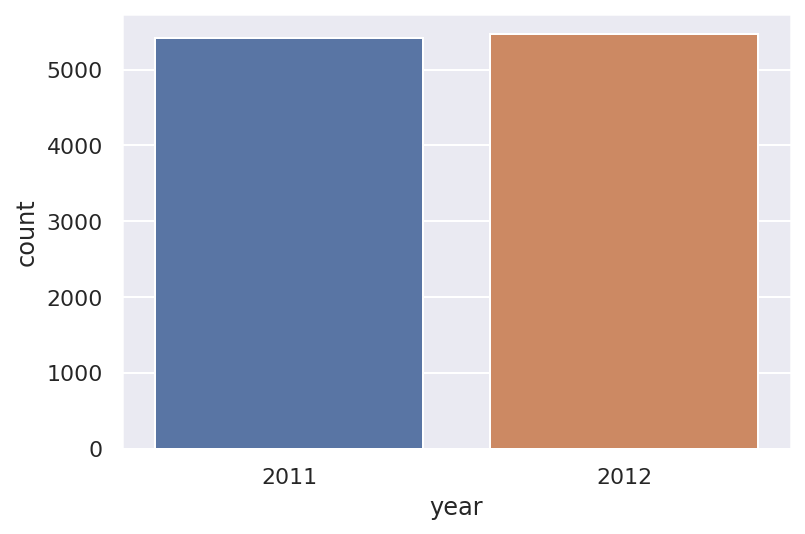

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="year", data=bike) # bike data set 중 year의 갯수를 countplot을 활용하여 그래프로 그려본다.

#### 3-2. subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

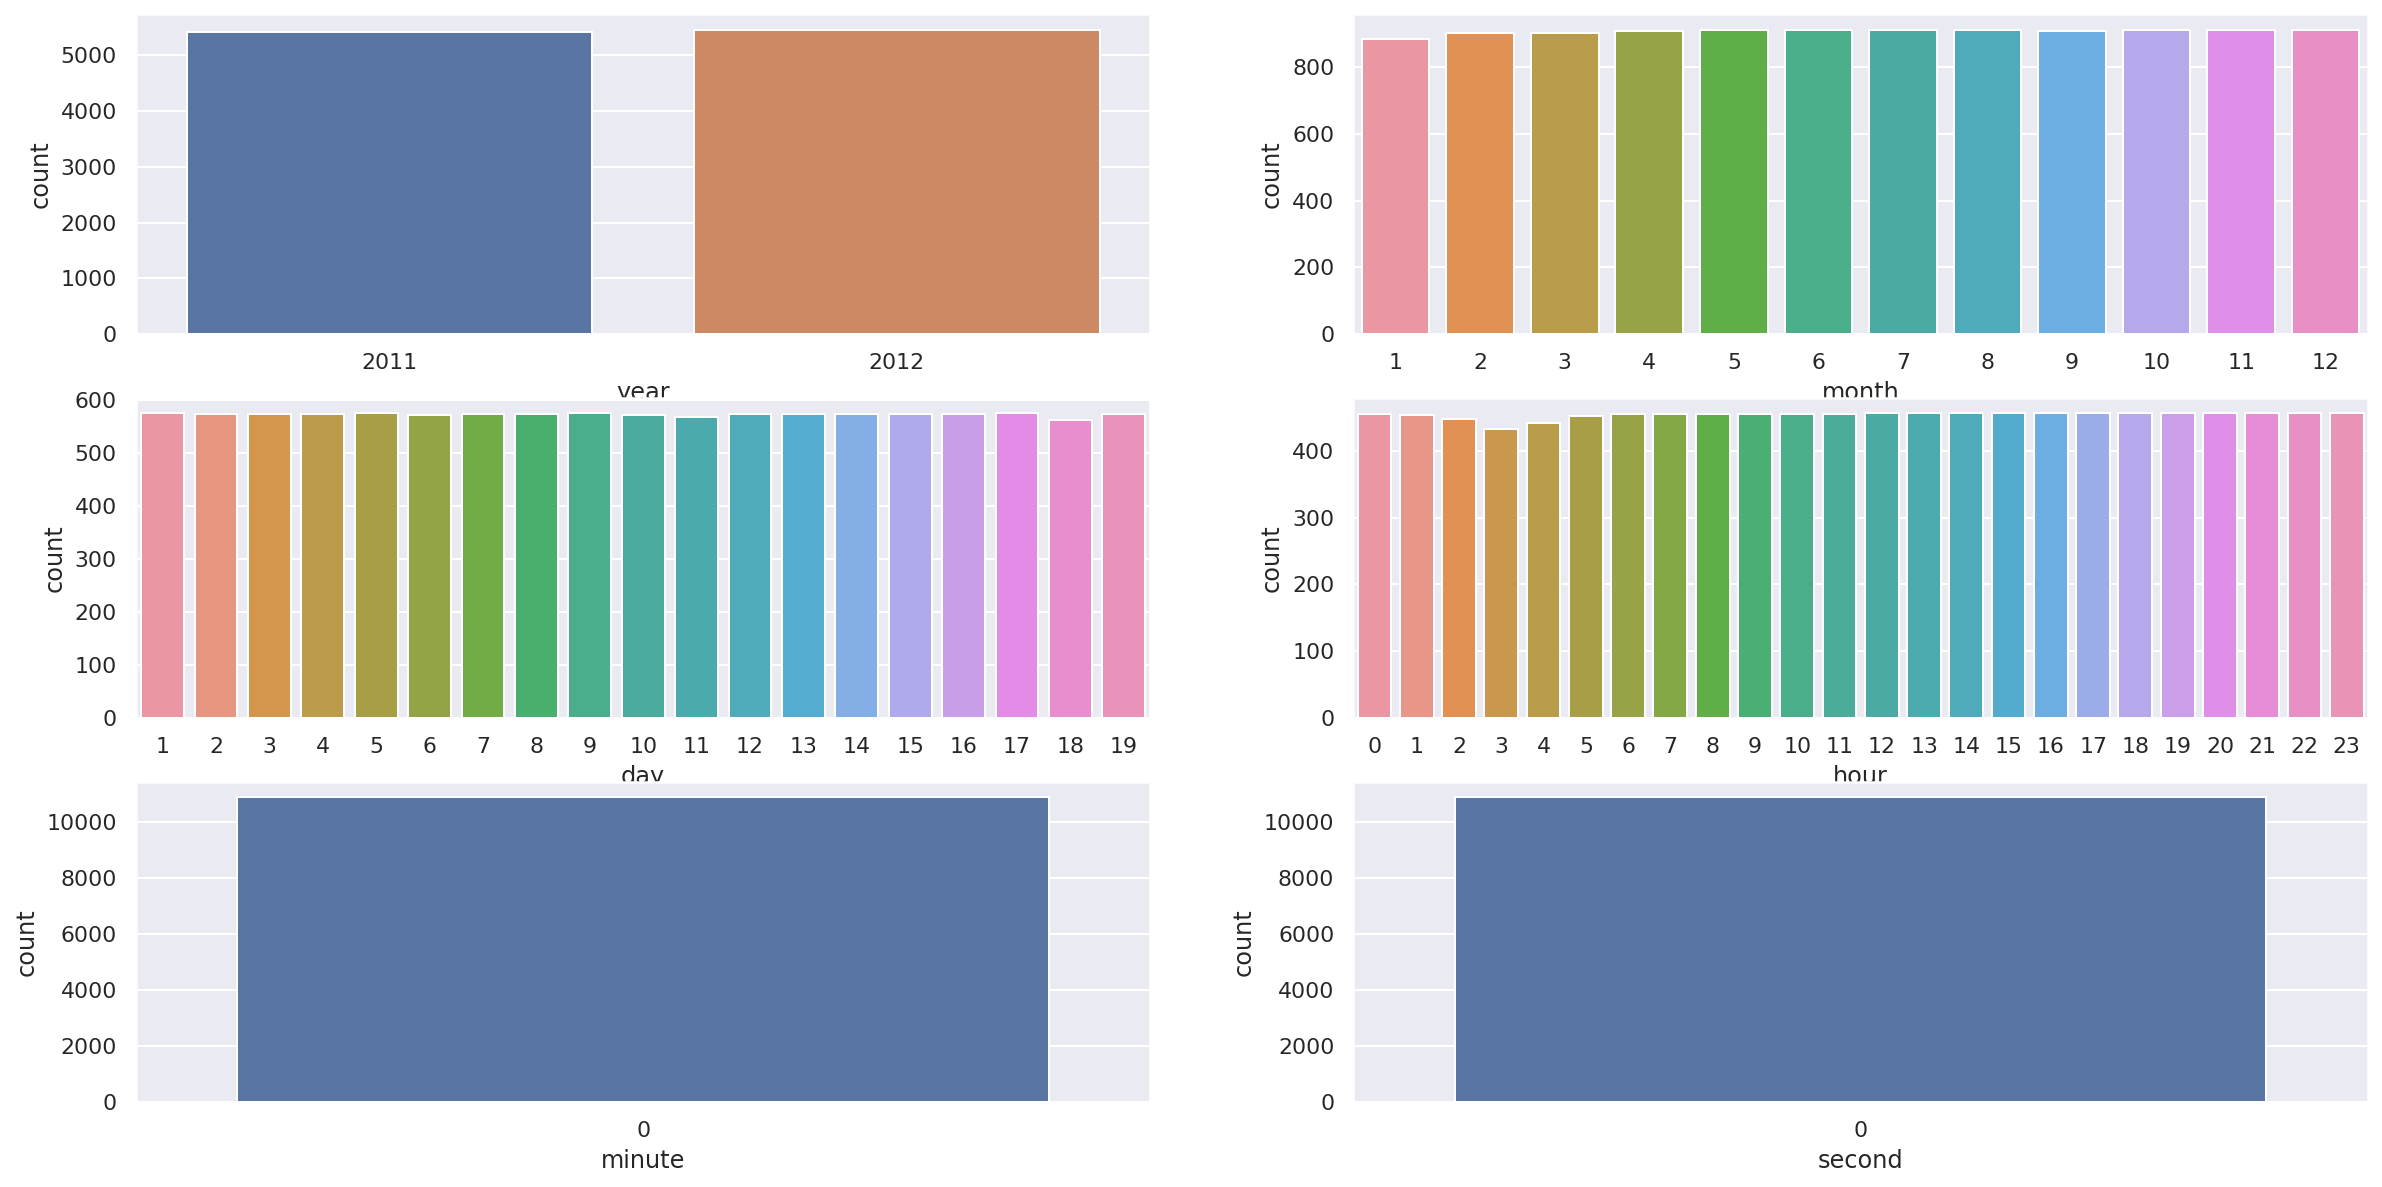

In [23]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(3, 2, 1)
ax = sns.countplot(x="year", data=bike)

plt.subplot(3, 2, 2)
ax = sns.countplot(x="month", data=bike)

plt.subplot(3, 2, 3)
ax = sns.countplot(x="day", data=bike)

plt.subplot(3, 2, 4)
ax = sns.countplot(x="hour", data=bike)

plt.subplot(3, 2, 5) 
ax = sns.countplot(x="minute", data=bike)

plt.subplot(3, 2, 6)
ax = sns.countplot(x="second", data=bike)

### 4. X, y 컬럼 선택 및 train/test 데이터 분리




##### 4-1. X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기


In [24]:
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


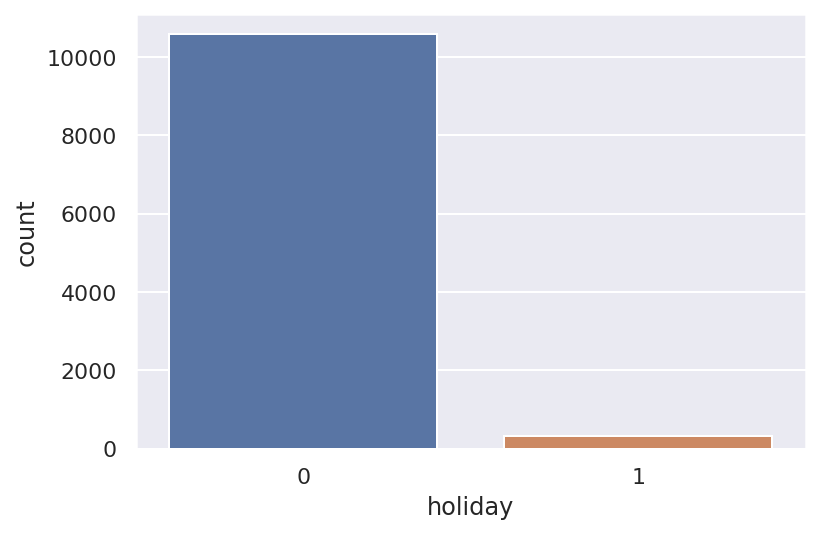

In [25]:
ax = sns.countplot(x="holiday", data=bike)

minute, second는 모두 0으로 되었어 분별력이 없다고 판단했고 holiday또한 0이 압도적으로 많아서 분별력이 없는 요소로 파악을 했다. 그리고 사실 data를 잘 살펴보면 casual과 register만 더하면 count값을 구할 수 있기에 최소한의 feature만 가지고 평가기준을 통과하기위하여 제거하고 나머지 요소들로만 모델을 학습 시켰다.

In [26]:
X = bike[['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity','windspeed', 'year', 'month', 'day', 'hour']].values
X[0]

array([1.0000e+00, 0.0000e+00, 1.0000e+00, 9.8400e+00, 1.4395e+01,
       8.1000e+01, 0.0000e+00, 2.0110e+03, 1.0000e+00, 1.0000e+00,
       0.0000e+00])

##### 4-2. count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [27]:
y = bike['count'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1231)

### 5. LinearRegression 모델 학습

#### 5-1. sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [28]:
from sklearn.linear_model import LinearRegression # 기본제공 모델인 LinearRegression 호출

model = LinearRegression()
model.fit(X_train, y_train) # train data 훈련

LinearRegression()

### 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

#### 6-1.학습된 모델에 X_test를 입력해서 예측값 출력하기

In [29]:
predictions = model.predict(X_test)

#### 6-2. 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기

#### 6-3. mse 값과 함께 rmse 값도 계산하기

In [30]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print('mse: ', mse)
print('rmse: ', mse**0.5)

mse:  19946.657650229525
rmse:  141.2326366327186


평가기준인 150보다 낮은 것을 확인할 수있다.

### 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

#### 7-1. x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기

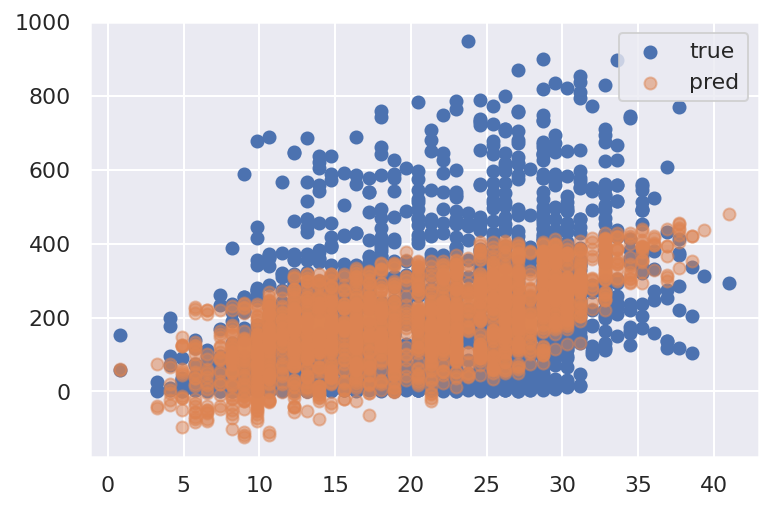

In [31]:
plt.scatter(X_test[:, 3], y_test, label="true")
plt.scatter(X_test[:, 3], predictions, label="pred", alpha= 0.5)
plt.legend()
plt.show()

#### 7-2. x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

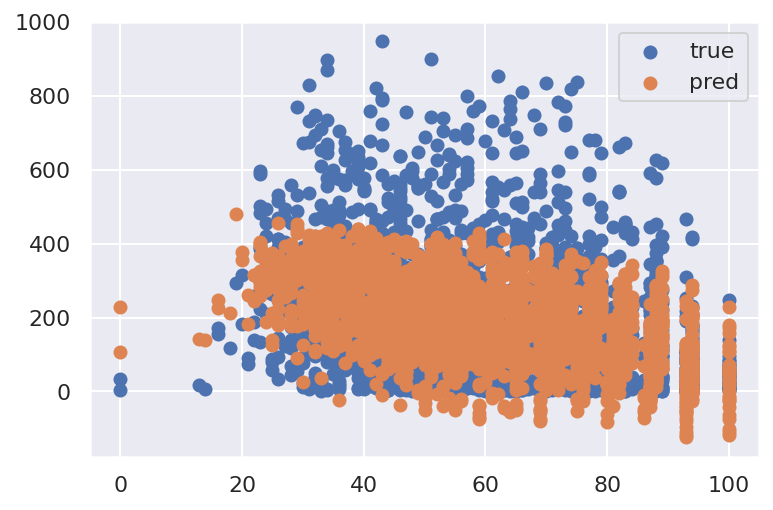

In [32]:
plt.scatter(X_test[:, 5], y_test, label="true")
plt.scatter(X_test[:, 5], predictions, label="pred")
plt.legend()
plt.show()

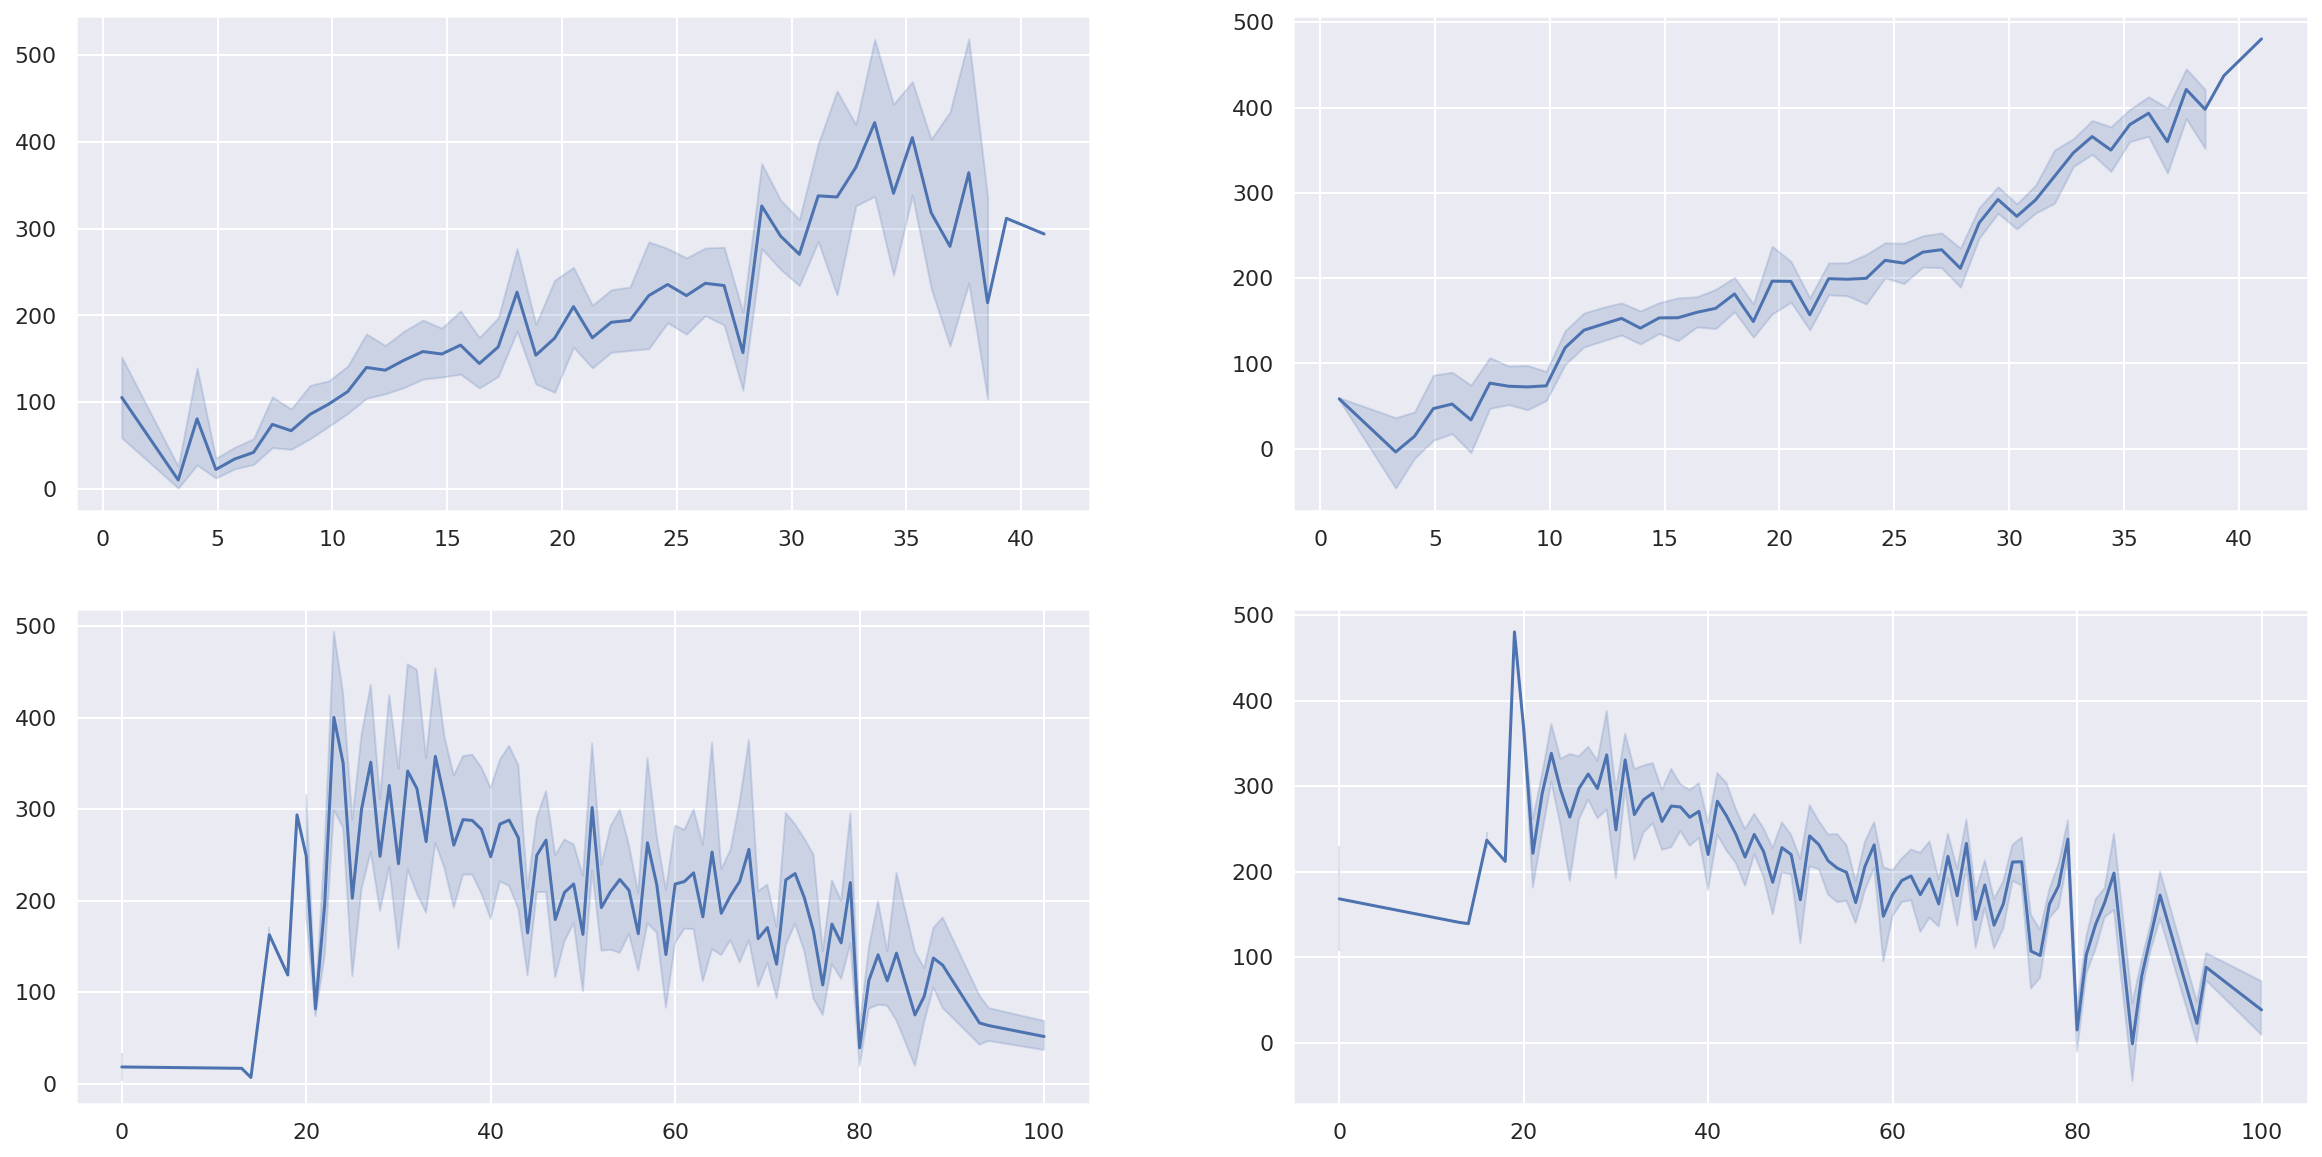

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(x = X_test[:, 3],y = y_test)

plt.subplot(2,2,2)
sns.lineplot(x = X_test[:, 3],y = predictions)

plt.subplot(2,2,3)
sns.lineplot(x = X_test[:, 5],y = y_test)

plt.subplot(2,2,4)
sns.lineplot(x = X_test[:, 5],y = predictions)

plt.show()

비슷한 파형을 보여주는 그래프를 확인할 수 있다.

### 8. 회고

- 프로젝트 1에서 직접 모델을 만들어보면서 회귀모델에서 깊게 공부할 수 있었다. 직접 model을 만들면 library를 사용할 때와 달리 적당한 learning rate와 학습횟수 설정을 해줘야한다. 어떻게 이것을 설정해줘야 효율적으로 설정해줄 수 있을까 고민을 했다. 아직 명확하게 해결은 못했지만 오차율을 정해준 선에서 빠르지만 정확한 값을 낼 수 있으면 되지않을까라는 생각이 들었다.
- numpy pandas 명령어에 애를 먹었다. 처음 프로젝트를 진행하면서 Pandas DataFrame을 안만들어주고 numpyarray로만 진행을 했었는데 인덱스 설정과 값 나눠주는 것이 어려웠었다. DataFrame에 왜 필요한지 알 수 있는 시간이었다. docs를 참고하는 것이 중요하다는 것을 깨달았다.
- csv 경로 설정을 항상 따라서 치기만 했었는데 폴더 안에 파일까지 들어가야한다는 것을 알았다. 잊지 말고 고생하지 말아야겠다.
- 모델의 성능 측정을 할 때 전 프로젝트에서 평가기준이었던 accurancy로 진행을 했었다.하지만 이번 프로젝트에서 진행한 모델은 회귀모델이기에 회귀모델에 맞는 평가기준인 MSPE, MSAE, R Square, Adjusted R Square같은 오차값을 써야한다.

### 9. 참고

(모델의 성능 측정)[https://rk1993.tistory.com/entry/모델-성능-평가-지표-회귀-모델-분류-모델]